<a href="https://colab.research.google.com/github/KarishmaCh/NasscomAIFC_Projects/blob/main/karihsma_chavan_of_NasscomAIFC_Project_61_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lesson:

 1. Multiple linear regression - Introduction
 2. Multicollinearity
 3. Variance Inflation Factor
 4. Car Price Prediction - RFE
 
 

---

### Problem Statement

Many of your friends may be worried about their chances of getting admission in their dream university for pursuing MS. So, you decided to help them by building a model which is capable of predicting their chance of getting admission in their dream masters program. This model should also help them in understanding which factors are important in MS admissions and what are the scores required for different tests to have better admission chances.

Build a prediction model using multiple linear regression to predict the likelihood of getting admission and evaluate the accuracy of the model.
If there is multicollinearity in the dataset, apply RFE to eliminate redundant features and validate the selected features using VIF.






---

### List of Activities

**Activity 1:** Analyse the Dataset

**Activity 2:** Find Correlation
  
**Activity 3:** Train-Test Split

**Activity 4:** Train the Model

**Activity 5:** Determine Highly Correlated Features

**Activity 6:** Perform RFE







---


#### Activity 1:  Analyse the Dataset

- Create a Pandas DataFrame for **Admission_Predict** dataset using the below link. This dataset consists of several parameters which are considered important during the application for Masters program:


|Field|Description|
|---:|:---|
|Serial No.|Serial No.|
|GRE Score|GRE Scores ( out of 340 )|
|TOEFL Score|TOEFL Scores ( out of 120 )|
|University Rating|University Rating ( out of 5 )|
|SOP|Statement of Purpose Strength ( out of 5 )|
|LOR|Letter of Recommendation Strength ( out of 5 )|
|CGPA|Undergraduate GPA ( out of 10 )|
|Research|Research Experience ( either 0 or 1 )|
|Chance of Admit|Chance of Admit ( ranging from 0 to 1 )|



  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Also drop the column `Serial No.` from the dataset as it is of no use for analysis. Check whether the column names contain any trailing and leading spaces. If yes, remove the whitespaces from the column names.

**Hint:** You can use `strip()` and `rename()` functions to remove unwanted whitespaces from the column name and to rename them.






In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv")
# Print first five rows using head() function
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Get the list of columns of the dataset.
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Drop 'Serial No.' column from the DataFrame
df.drop('Serial No.', axis = 1, inplace = True)

In [ ]:
# Remove whitespaces from both ends in the column name if there are any
for i in df.columns:
  df.rename(columns={i:i.strip()},inplace=True)

# Get list of all the columns after renaming.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


---

#### Activity 2: Find Correlation

We need to predict the value of `Chance of Admit` variable, given other variables. Thus, `Chance of Admit` is the target variable and other columns except `Chance of Admit` are the feature variables.

Find the columns that are highly correlated with the `Chance of Admit` column. For this, calculate the correlation coefficient values between all the columns and then use a heatmap to visualise these correlations.

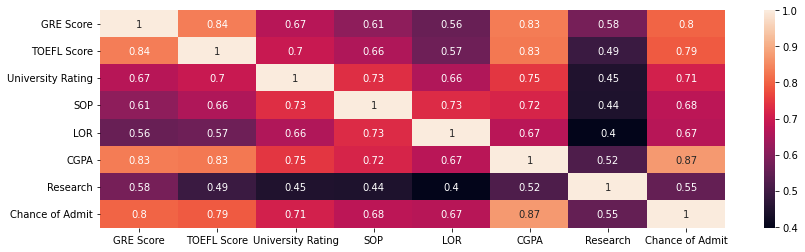

In [ ]:
# Calculate correlation coefficient for all columns of the DataFrame
corr_coef=np.corrcoef(df)[1]

# Use heatmap to observe correlations.
plt.figure(figsize=(14,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

---

#### Activity 3: Train-Test Split


Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.


from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.30,random_state=45)

features = list(df.columns)
#features.remove(' Chance of Admit')

x_train = train_df[features]
y_train = train_df['Chance of Admit']
x_test = test_df[features]
y_test = test_df['Chance of Admit']

---

#### Activity 4: Train the Model

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build the linear regression model using all the features 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
x_train_rfe_1=x_train[features]
x_train_rfe_1=sm.add_constant(x_train_rfe_1)
x_train_rfe_sm=sm.OLS(y_train,x_train_rfe_1).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Print the summary of the linear regression report.
print(x_train_rfe_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.636e+30
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:14:02   Log-Likelihood:                 9392.3
No. Observations:                 280   AIC:                        -1.877e+04
Df Residuals:                     271   BIC:                        -1.873e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9.437e-16   1.78e-1

**Q:** Does the summary report indicate the presence of multicollinearity?

**A:** 

----

#### Activity 5: Determine Highly Correlated Features

Find the moderately to highly correlated features with `Chance of Admit` and the corresponding correlation values.

In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with 'Chance of Admit' and the corresponding correlation values.
values={}
for i in features:
  corr_coef=np.corrcoef(df['Chance of Admit'],df[i])[0,1]
  if (corr_coef>=0.5) or (corr_coef<=-0.5):
    values[i]=corr_coef
print(values)

{'GRE Score': 0.8026104595903499, 'TOEFL Score': 0.7915939869351049, 'University Rating': 0.7112502503917218, 'SOP': 0.6757318583886716, 'LOR': 0.6698887920106936, 'CGPA': 0.8732890993553001, 'Research': 0.5532021370190395, 'Chance of Admit': 1.0}


**Q:** How many features are moderately to highly correlated with `Chance of Admit`?

**A:** 





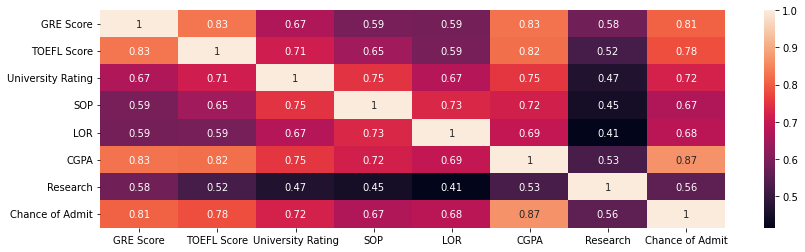

In [ ]:
# Create a heatmap to visualise the correlation between the above correlated features (if there exists).
plt.figure(figsize=(14,4))
sns.heatmap(x_train[values.keys()].corr(),annot=True)
plt.show()

#### Activity 6: Perform RFE (Recursive Feature Elimination)

1. Choose the number of features that you want to use for RFE (choose 3 to 5 features).
2. Apply RFE using `sklearn.feature_selection` module.
2. Build linear regression model using the best features selected by RFE.
3. Validate the significance of the selected features by calculating their VIF values.

In [ ]:
# Use RFE to eliminate few features from the dataset.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Import RFE
lin_reg_3=LinearRegression()
rfe1=RFE(lin_reg_3,n_features_to_select=5)
# RFE with 3-5 features.
rfe1.fit(x_train[values.keys()],y_train)

# Fit with selected features.
print(values.keys())
# Print the 'support_' and 'ranking_' attributes to find out the features selected by RFE
print(rfe1.support_)
print(rfe1.ranking_)

dict_keys(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'])
[ True False False  True  True  True False  True]
[1 3 2 1 1 1 4 1]


In [ ]:
# Print the features selected by RFE in the previous step.
rfe_feature=x_train[values.keys()].columns[rfe1.support_]
print(rfe_feature)

Index(['GRE Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit'], dtype='object')


In [ ]:
# Build a linear regression model using the 'statsmodels.api' module having the above features selected by RFE.
# Import the 'statsmodels.api' module.
import statsmodels.api as sm
# Subset the train set such that it contains only the above  selected features.
x_train_rfe_1=x_train[rfe_feature]

# Add the 'const' column to the features set.

x_train_rfe_1=sm.add_constant(x_train_rfe_1)
# Fit the model

x_train_rfe_sm=sm.OLS(y_train,x_train_rfe_1).fit()
# Print the summary of the linear regression report
print(x_train_rfe_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.536e+31
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:14:02   Log-Likelihood:                 9708.7
No. Observations:                 280   AIC:                        -1.941e+04
Df Residuals:                     274   BIC:                        -1.938e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.374e-15   5.33e-16     

In [ ]:
# Check for the VIF values of the features selected by RFE above. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF=pd.DataFrame()
VIF['feature']=x_train_rfe_1.columns
VIF['VIF']=[variance_inflation_factor(x_train_rfe_1.values,i) for i in range(x_train_rfe_1.shape[1])]

VIF['VIF']=round(VIF['VIF'],2)
VIF=VIF.sort_values(by='VIF',ascending=False)
print(VIF)

           feature      VIF
0            const  1740.37
4             CGPA     5.80
5  Chance of Admit     4.81
1        GRE Score     3.52
2              SOP     2.66
3              LOR     2.57


**Q:** How many features have VIF values above 10?

**A:** 

**Q:** What is the $R^2$ value after RFE?

**A:** 


----